# Part A: Hybrid Image (25 Points)

## Overview

A hybrid image is the sum of a *low-pass filtered* version of the one image and a *high-pass filtered* version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the “cutoff-frequency”. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images. [This](https://drive.google.com/uc?id=187FjBJLwnYXhylx08Vdh1SAA3AO-imYv) is the sample example.

NOTE:

1. Reading [this](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) will help in understanding Part A.

2. You can use any image processing libraries of your choice such as skimage or cv2; in python.

We provided 7 pairs of aligned images. The alignment is important because it affects the perceptual grouping (read the paper for details). We encourage you to create additional examples (e.g. change of expression, morph between different objects, change over time, etc.).

You are required to provide **THREE hybrid image results**. Choose ONE of the results, and use it to provide answers to the following **FOUR sub-parts** mentioned in the write-up.

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [1]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 150MB/s]
Archive:  /content/hybrid_pyramid_input.zip
   creating: /content/data/
  inflating: /content/data/Afghan_girl_before.jpg  
  inflating: /content/data/motorcycle.bmp  
  inflating: /content/data/cat.bmp   
  inflating: /content/data/makeup_before.jpg  
  inflating: /content/data/fish.bmp  
  inflating: /content/data/bicycle.bmp  
  inflating: /content/data/makeup_after.jpg  
  inflating: /content/data/plane.bmp  
  inflating: /content/data/marilyn.bmp  
  inflating: /content/data/dog.bmp   
  inflating: /content/data/Afghan_girl_after.jpg  
  inflating: /content/data/submarine.bmp  
  inflating: /content/data/bird.bmp  
  inflating: /content/data/einstein.bmp  


## Code

In [2]:
# Helper Functions
def read_image(image_path):
    """
    :param image_path: path to the image
    :return: floating representation of the image
    """
    image = plt.imread(image_path)
    return np.array(image) /255.0

def gaussian_2D_filter(size, cutoff_frequency):
    """
    :param size: tuple (width, height) that decides the filter size
    :param cutoff_frequency: hyperparameter to control the variance of the filter
    :return: 2D gaussian filter with the desired size, and variance scaled by cutoff_frequency
    Hint: make sure the filter sums up to one
    """
    width, height = size
    x, y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
    sigma = cutoff_frequency
    filter = (np.exp(-((x**2 + y**2) / (2.0 * sigma**2))))/(2*np.pi*sigma**2)
    filter = filter / np.sum(filter)
    return filter

def imgfilter(image, filter):
    """
    :param image: input image to apply the filter on
    :param filter: to apply on the image
    :return: apply the filter by convolving
    Do NOT use for loops. See how to convolve with scipy or numpy
    """
    output = np.zeros_like(image)
    # Apply the filter (convolution) on each color channel separately
    for i in range(image.shape[2]):
        output[..., i] = convolve2d(image[..., i], filter, mode='same')

    return output

def log_mag_FFT(image):
    """
    :param image: float matrix representation of the image
    :return: log of the magnitude of the FFT of the image
    HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it.
    NOTE: numpy fft2 would require you to convert the image to greyscale for it to work properly
    """
    # Check if image is already grayscale
    if len(image.shape) == 2:
        image_gray = image
    else:
        # Convert the image to grayscale
        image_gray = np.mean(image, axis=-1)

    # Compute the FFT and shift the zero-frequency component to the center of the spectrum
    fft = np.fft.fftshift(np.fft.fft2(image_gray))

    # Compute the magnitude of the FFT and take its logarithm
    mag = np.abs(fft)
    output = np.log(1 + mag) #added one to avoid taking log of possible zeros
    return output

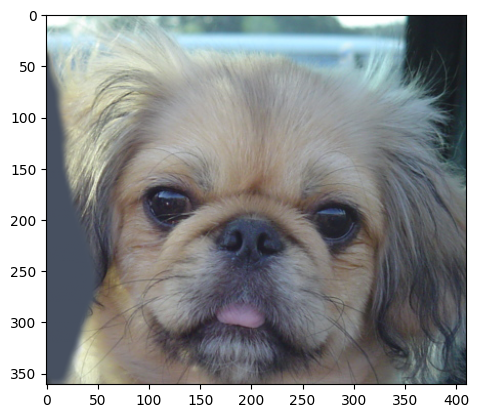

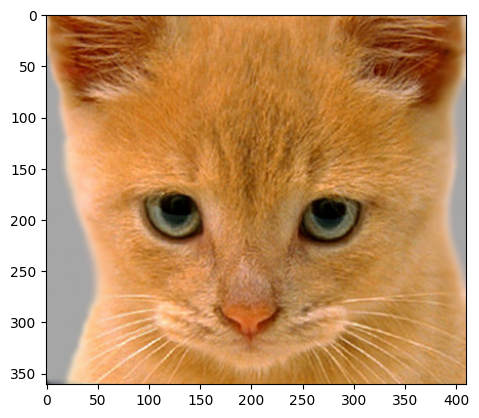

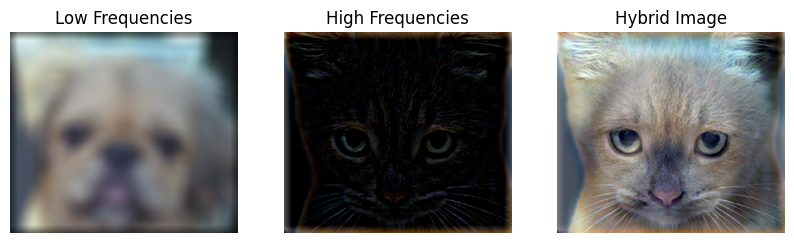

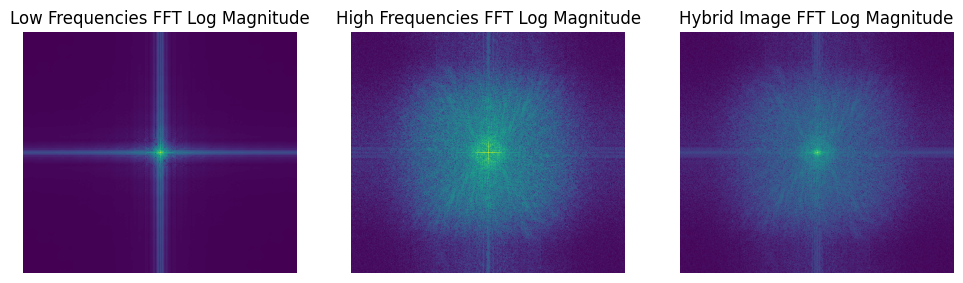

In [3]:
# Import necessary packages here
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from scipy.signal import convolve2d


# the images downloaded above should be available under /content/data
# use the file directory on the left to navigate
image_path1 = ('/content/data/dog.bmp')
image_path2 = ('/content/data/cat.bmp')

image_1 = read_image(image_path1)
image_2 = read_image(image_path2)

# TUNE cutoff_frequency
cutoff_frequency = 7
filter_size = cutoff_frequency*4+1
"""cutoff_frequency is the standard deviation, in pixels, of the
Gaussian blur that will remove the high frequencies from one image (image_1) and
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""

filter = gaussian_2D_filter((filter_size, filter_size), cutoff_frequency)
#plt.imshow(filter)

"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

blurred_image1 = imgfilter(image_1, filter=filter)
low_frequencies = blurred_image1

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""
blurred_image2 = imgfilter(image_2, filter=filter)
high_frequencies = image_2 - blurred_image2

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
hybrid_image= low_frequencies + high_frequencies

"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
plt.imshow(image_1)
plt.show()

plt.imshow(image_2)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
for ax in axes:
    ax.axis('off')

axes[0].imshow(low_frequencies, cmap=None)
axes[0].set_title('Low Frequencies')

axes[1].imshow(high_frequencies, cmap=None)
axes[1].set_title('High Frequencies')

axes[2].imshow(hybrid_image,cmap=None)
axes[2].set_title('Hybrid Image')

plt.show()

"""Secondly, also visualize log magnitude of Fourier Transform of the above."""
FFT_highFreq = log_mag_FFT(high_frequencies)
FFT_lowFreq = log_mag_FFT(low_frequencies)
FFT_image = log_mag_FFT(hybrid_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax in axes:
    ax.axis('off')

axes[0].imshow(FFT_lowFreq, cmap=None)
axes[0].set_title('Low Frequencies FFT Log Magnitude')

axes[1].imshow(FFT_highFreq, cmap=None)
axes[1].set_title('High Frequencies FFT Log Magnitude')

axes[2].imshow(FFT_image,cmap=None)
axes[2].set_title('Hybrid Image FFT Log Magnitude')

plt.show()



## **Write-up**


1.   Provide the original and filtered images.
2.   Provide the the hybrid image and hybrid_image_scale using given helper function *vis_hybrid_image*.
3.   Log magnitude of the Fourier transform of the two original images, the filtered images, and the hybrid image.
4.   Briefly explain how this works, using your favorite results as illustrations.

# Answers - Part 1

0. First, here is a link of three hybrid images from the 7 samples you provided.


> [First](https://drive.google.com/file/d/1YRTm3TgOQSsWNNZShJ46q0OP_W0slDKr/view?usp=share_link), [Second](https://drive.google.com/file/d/1YRBYtfyqxfCJ7deOV3hgVfVLrehFS-qB/view?usp=share_link), [Third](https://drive.google.com/file/d/1p_2WLb7BzEjJ9NS5VH2vZSP4zR-oA5hY/view?usp=share_link)

I will use the first one as my best result to provide answers for the writeup:

1. [Here](https://drive.google.com/file/d/1SANMNF7HUd6NMSklkPtIBzhf4rjS2S4J/view?usp=share_link) are the original and filtered image as shown in the output from the cell, as well.

3. [Here](https://drive.google.com/file/d/1A_gZrUAI9txZIadL5hDs6QXwlIIES00e/view?usp=share_link) is the FFT for the images.

4. This code uses the hybrid image creation technique to generate an image that looks like one image when viewed from a distance and another image when viewed up close. This is achieved by using low-pass filtering to generate one image and high-pass filtering to generate the other, and then combining them. The visualization of the log magnitude of the Fourier transform helps to understand the frequency contents of the images.






# Part B: Pyramid Image (25 Points)

## Overview
Choose an image that has interesting variety of textures (from Flickr or your own images). The images should be atleast 640X480 pixels and converted to grayscale. Write code for a Gaussian and Laplacian pyramid of level N (use for loops). In each level, the resolution should be reduced by a factor of 2. Show the pyramids for your chosen image in your write-up. Here is an [example](https://drive.google.com/uc?id=17Y287EA-GJ2z0wtm_M7StIWsXyFeHvrz).

## Code

In [4]:
# Populate Helper Functions:

def imgfilter(image, filter):
  output = convolve2d(image, filter, mode='same')
  return output

# Helper function to downsample an image by a factor of 2
def downsample(img):
  # Smooth, then downsample
  filter = gaussian_2D_filter((3,3), 1)
  down_img = imgfilter(img, filter)
  down_img = img[::2, ::2]
  return down_img

# Helper function to upsample an image by a factor of 2
def upsample(img):
  h, w = img.shape
  up_img = np.zeros((h*2, w*2))
  up_img[::2, ::2] = img
  up_img = imgfilter(up_img, gaussian_2D_filter((3,3), 1))  # Gaussian blur to avoid aliasing
  return up_img


def pyramidsGL(image, num_levels):
  ''' Creates Gaussian (G) and Laplacian (L) pyramids of level "num_levels" from image im.
  G and L are list where G[i], L[i] stores the i-th level of Gaussian and Laplacian pyramid, respectively. '''
  # Create Gaussian and Laplacian pyramids of level num_levels from image
  G = [image]
  L = []

  for i in range(num_levels-1):
      G_down = downsample(G[i])
      G_up = upsample(G_down)
      L.append(G[i] - G_up)
      G.append(G_down)

  # Add the last level of Gaussian pyramid
  L.append(G[-1])

  return G, L


def displayPyramids(G, L):
  '''Role of this function is to display intensity and Fast Fourier Transform (FFT) images of pyramids.
  NOTE: You may re-use your helper function  "log_mag_FFT" to compute this.'''

  fig1, axs1 = plt.subplots(2, len(G), figsize=(20,7))
  fig2, axs2 = plt.subplots(2, len(G), figsize=(20,7))
  lim_min = 200
  lim_max = 400


  # plot intensity images of Gaussian and Laplacian pyramids
  for i in range(len(G)):
    axs1[0, i].imshow(G[i], cmap='gray')
    axs1[0, i].set_title(f'Gaussian {i+1}')
    axs1[0, i].axis('off')
    axs1[1, i].imshow(L[i], cmap='gray')
    axs1[1, i].set_title(f'Laplacian {i+1}')
    axs1[1, i].axis('off')

# plot log magnitude of FFT of Gaussian and Laplacian pyramids
    G_fft = log_mag_FFT(G[i])

    axs2[0, i].imshow(G_fft, cmap=None)
    axs2[0, i].set_title(f'Gaussian FFT {i+1}')
    axs2[0, i]
    axs2[0, i].set_xlim([lim_min,lim_max])
    axs2[0, i].set_ylim([lim_min,lim_max])

    L_fft = log_mag_FFT(L[i])

    axs2[1, i].imshow(L_fft, cmap=None)
    axs2[1, i].set_title(f'Laplacian FFT {i+1}')
    axs2[1, i].set_xlim([lim_min,lim_max])
    axs2[1, i].set_ylim([lim_min,lim_max])

    lim_min /= 2
    lim_max /= 2

  plt.show()
  return

def reconstructLaplacianPyramid(L, smallest_g):
  '''Given a Laplacian Pyramid L, reconstruct an image img.
     smallest_g should be the smallest scale of the gaussian pyramid (i.e. G[-1])
  '''
  assert L[-1].shape == smallest_g.shape
  img = smallest_g

  for i in range(len(L)-1,0, -1):
    L[i] = upsample(L[i])
    img = L[i-1] + L[i]
  return img


def reconstruction_error(original, reconstructed):
    padded_reconstructed = np.zeros_like(original)
    padded_reconstructed[:reconstructed.shape[0], :reconstructed.shape[1]] = reconstructed
    error = np.sqrt(np.sum((original - padded_reconstructed) ** 2))
    #error = np.linalg.norm(original-padded_reconstructed)
    return error


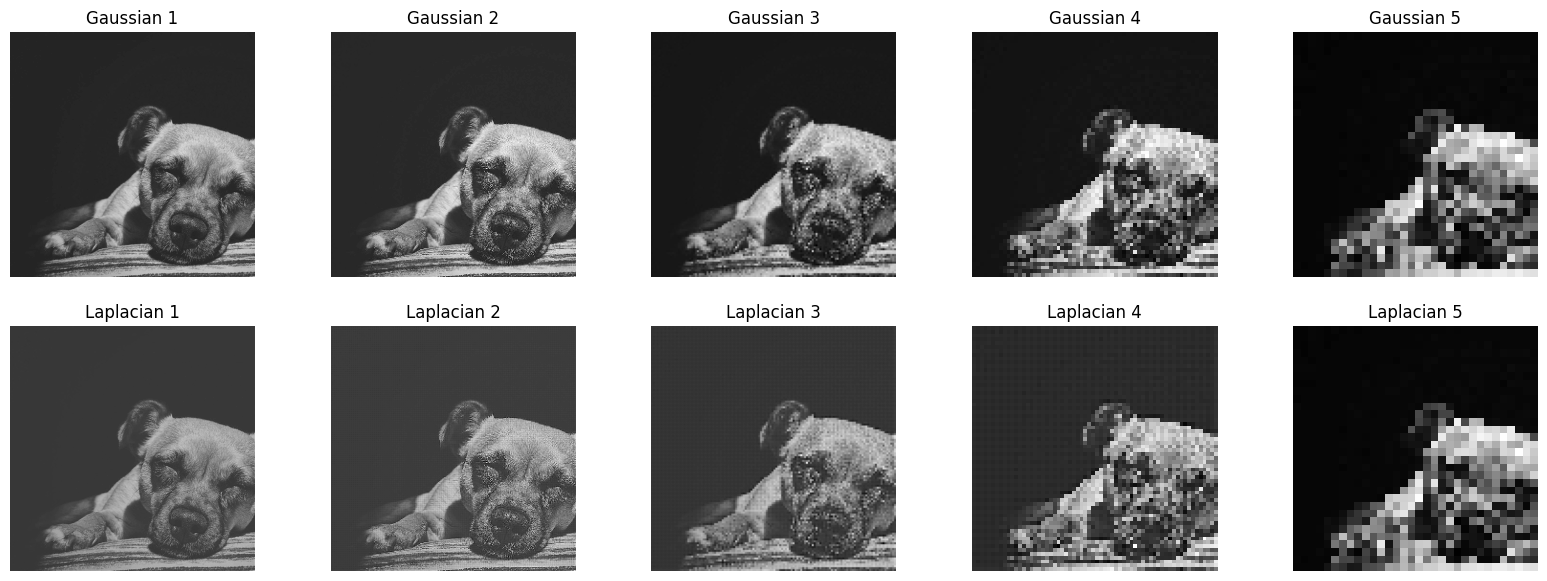

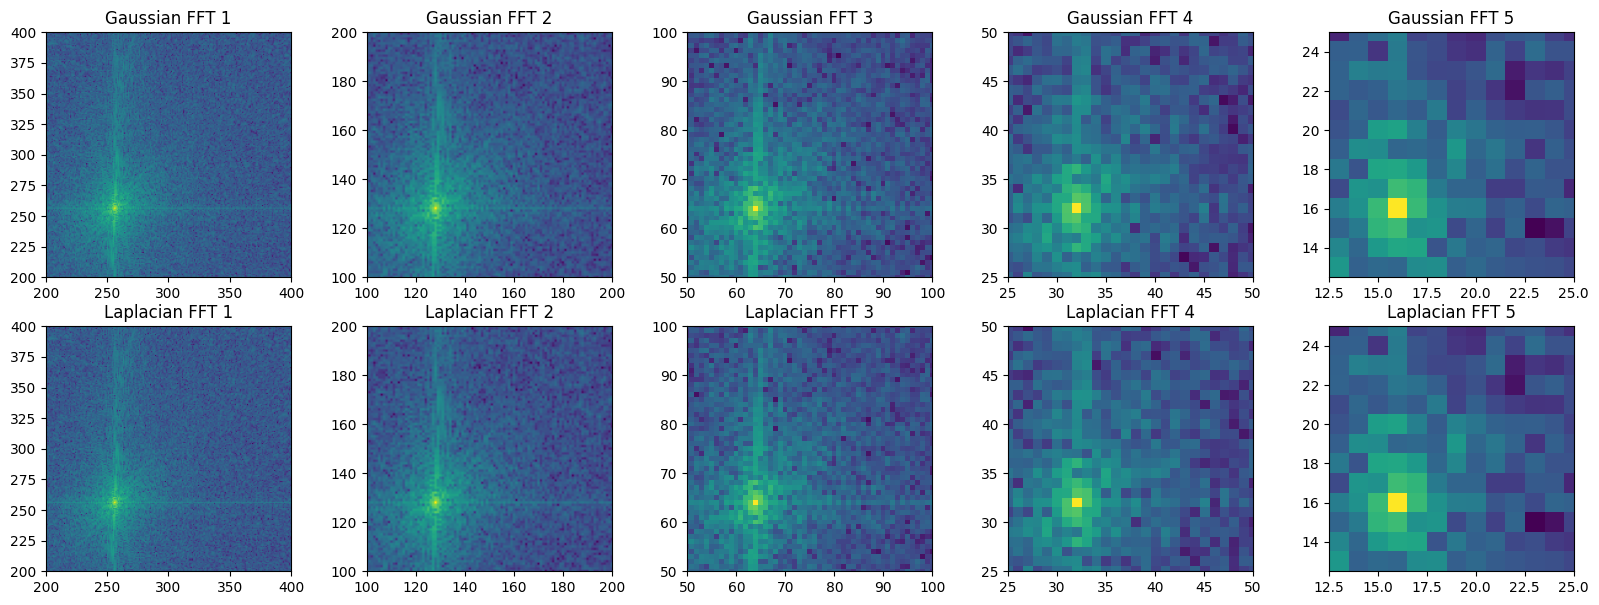

Reconstruction error with L2 norm: 10.822291954985426


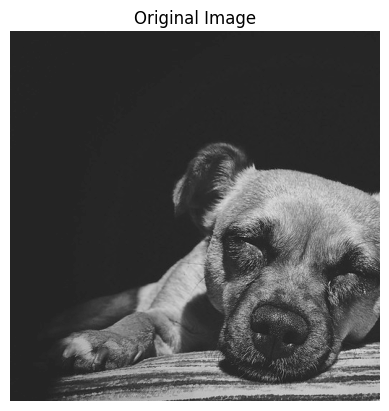

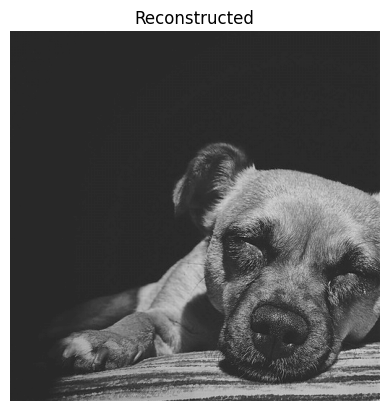

In [8]:
"""
Steps:
1. Load an image im.
2. Call function pyramidsGL with image and num_levels = 5
3. Call function displayPyramids with G, L
4. Call function reconstructLaplacianPyramid with the generated L and ONLY the smallest scale of G
5. Compute reconstruction error with L2 norm and print the error value.
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.signal import convolve2d

# Load the image
#image = cv2.imread('/content/Dog2_Part2.jpg', cv2.IMREAD_GRAYSCALE)
image = plt.imread('/content/Dog2_Part2.jpg')
image = np.mean(image, axis=-1)
image = np.array(image) /255.0

# Crop the image to make its dimensions a power of 2
h, w = image.shape
new_h = 2 ** int(np.log2(h))
new_w = 2 ** int(np.log2(w))
image = image[:new_h, :new_w]

# Create Gaussian and Laplacian pyramids of level 5 from the image
G, L = pyramidsGL(image, 5)

# Display the pyramids
displayPyramids(G, L)

# Reconstruct the image from the Laplacian pyramid
reconstructed_image = reconstructLaplacianPyramid(L, G[-1])

# compute the reconstruction error using L2 norm
error = reconstruction_error(image, reconstructed_image)

# print the error value
print(f'Reconstruction error with L2 norm: {error}')

# Display the original and reconstructed images
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.show()

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed')
plt.axis("off")
plt.show()

## **Write-up**

1. (10 Points) Display a Gaussian and Laplacian pyramid of level 5 (using your code). It should be formatted similar to [this](https://drive.google.com/file/d/1mAommQeJsp7WS8QCrZRcr8cQiltPPOh2/view?usp=sharing) figure.

2. (10 Points) Display the FFT amplitudes of your Gaussian/Laplacian pyramids Appropriate display ranges (from 0 to 1) should be chosen so that the changes in frequency in different levels of the pyramid are clearly visible. Explain  what the Laplacian and Gaussian pyramids are doing in terms of frequency. [This](https://drive.google.com/file/d/1BqTPKq6Mqqxl5jNNPkvx4JOA5MRgVq08/view?usp=sharing) looks like the expected output.

3. (5 Points) Image Reconstruction


# Answers:



1.   [Here](https://drive.google.com/file/d/145kO6Krw7IUnY6Gsd1Abj-tpjB39EHN8/view?usp=sharing) is a picture displaying the Gaussian/Laplacian pyramids of level 5, formatted as requested. The implementation for this display is included in the helper function:  
```
displayPyramids(G, L)
```

2. [Here](https://drive.google.com/file/d/17-Sg3afeTMxCZGEmKtdAoAHNcM3fQsaS/view?usp=sharing) is the picture that shows the FFT amps of the Gaussian/Laplacian pyramids. In terms of frequency, the Gaussian pyramid is used to decompose an image into a series of blurred versions of the original image. Each level of the pyramid is created by filtering the previous level with a Gaussian filter, which removes high-frequency components from the image, which acts like a "low-pass filter". The Laplacian pyramid is then constructed by taking the difference between adjacent levels of the Gaussian pyramid. This difference represents the high-frequency components of the image that were removed by the Gaussian filter. The lowest level of the Laplacian pyramid contains the high-frequency components, while the highest level is the smallest image.

3. [Here](https://drive.google.com/file/d/1WW_cFNa-uqrtClGD5KRIzYNgZ1yaDFNZ/view?usp=share_link) you can find the reconstructed image with the original image. The difference is tiny and most of the details are maintained. This reconstruction takes advantage of the laplacian/Gaussian pyramid algorithm to represent an image at multiple scales, which can be useful for tasks like image compression, image enhancement, or feature extraction.


